In [186]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
# import lazypredict

from plotly.subplots import make_subplots
import plotly.graph_objects as go
import warnings
warnings.filterwarnings("ignore")

import statsmodels.tsa.stattools as st
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.arima.model import ARIMA

from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

In [187]:
df_ger = pd.read_csv('Data/Germany.csv',  index_col='Year')
df_ger # the one with categorical variable for Germany

,Country,ISO 3166-1 alpha-3,Total,Coal,Oil,Gas
Year,,,,,,
1980,Germany,DEU,1100.065995,551.175520,412.456480,115.452640
1981,Germany,DEU,1048.523357,557.748736,361.299712,110.000608
1982,Germany,DEU,1015.733894,550.812784,344.463632,102.016752
1983,Germany,DEU,1011.604905,553.738320,333.397148,106.021121
1984,Germany,DEU,1033.244579,572.331456,334.889600,108.531344
1985,Germany,DEU,1044.117955,579.375692,340.221911,108.531724
1986,Germany,DEU,1047.471904,573.762079,356.828387,100.550801
1987,Germany,DEU,1032.442842,560.223918,345.534743,109.546660
1988,Germany,DEU,1029.024130,552.860960,351.260352,107.637328


In [188]:
# Drop the categorial variables
df= df_ger.select_dtypes(include=['float64'])
df

,Total,Coal,Oil,Gas
Year,,,,
1980,1100.065995,551.175520,412.456480,115.452640
1981,1048.523357,557.748736,361.299712,110.000608
1982,1015.733894,550.812784,344.463632,102.016752
1983,1011.604905,553.738320,333.397148,106.021121
1984,1033.244579,572.331456,334.889600,108.531344
1985,1044.117955,579.375692,340.221911,108.531724
1986,1047.471904,573.762079,356.828387,100.550801
1987,1032.442842,560.223918,345.534743,109.546660
1988,1029.024130,552.860960,351.260352,107.637328


In [189]:
#  plot to see total emission versus year for 'Germany'
fig_ger = px.line(df, x=df.index, y="Total")
fig_ger.update_xaxes(rangeslider_visible=True)
fig_ger.show()

Visualize the time series

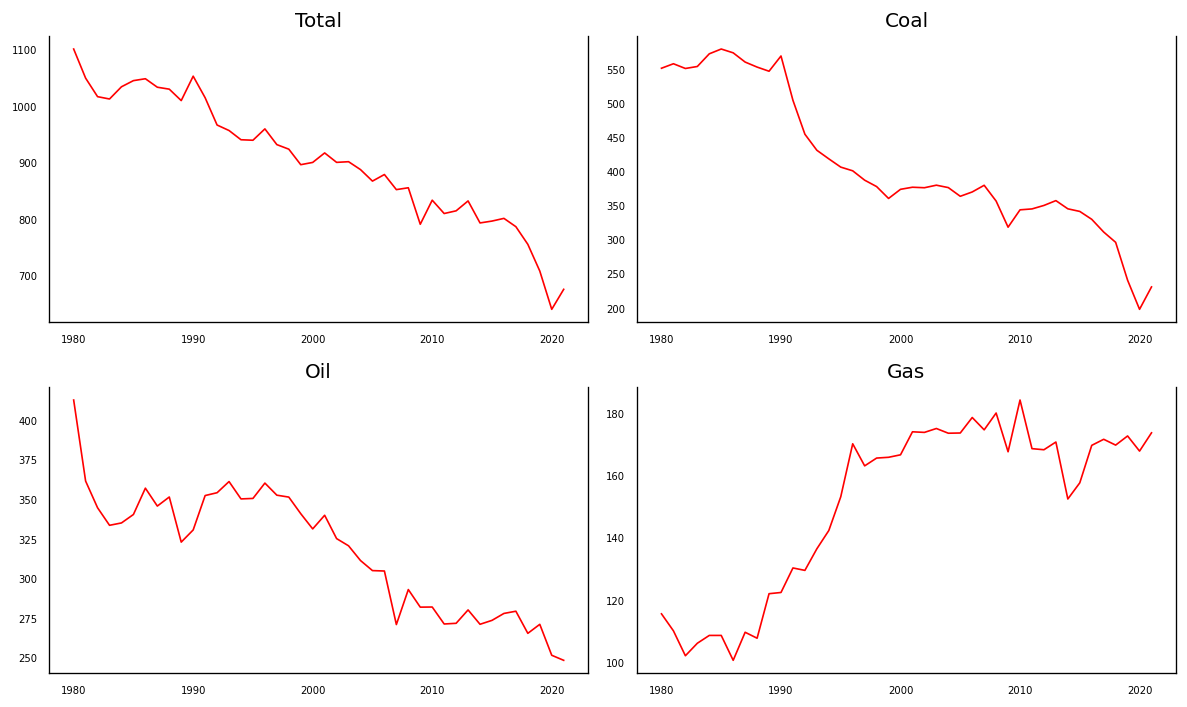

In [190]:
# Plot
fig, axes = plt.subplots(nrows=2, ncols=2, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = df[df.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    # Decorations
    ax.set_title(df.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

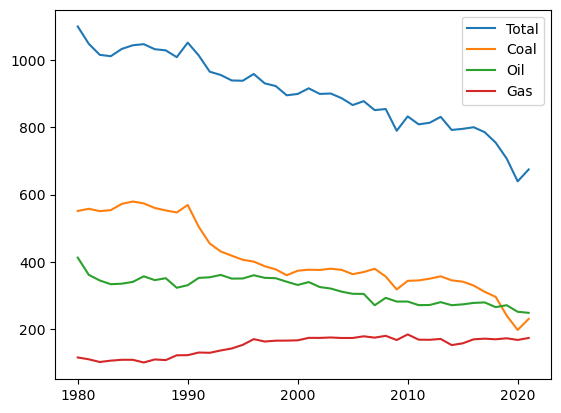

In [191]:
plt.figure()

x = df.index
y1 = df['Total']
y2 = df['Coal']
y3 = df['Oil']
y4 = df['Gas']






plt.plot(x,y1)
plt.plot(x,y2)
plt.plot(x,y3)
plt.plot(x,y4)




plt.legend(['Total', 'Coal', 'Oil', 'Gas'])

Grainger's Causality Test

In [192]:
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=12
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

grangers_causation_matrix(df, variables = df.columns)   

,Total_x,Coal_x,Oil_x,Gas_x
Total_y,1.0,0.0,0.0,0.0
Coal_y,0.0,1.0,0.0,0.0
Oil_y,0.0,0.0,1.0,0.0
Gas_y,0.0,0.0,0.0,1.0


 Cointegration Test

In [193]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(df, alpha=0.05): 
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

cointegration_test(df)

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
Total  ::  116.48    > 40.1749   =>   True
Coal   ::  59.99     > 24.2761   =>   True
Oil    ::  20.69     > 12.3212   =>   True
Gas    ::  5.93      > 4.1296    =>   True


Split the Series into Training and Testing Data

In [194]:
nobs = 5
df_train, df_test = df[0:-nobs], df[-nobs:]

# Check size
print(df_train.shape)  
print(df_test.shape) 

(37, 4)
(5, 4)


Check for Stationarity and Make the Time Series Stationary

In [195]:
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")    

In [196]:
# ADF Test on each column
for name, column in df_train.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "Total" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -0.7389
 No. Lags Chosen       = 9
 Critical value 1%     = -3.7
 Critical value 5%     = -2.976
 Critical value 10%    = -2.628
 => P-Value = 0.8364. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "Coal" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -0.7807
 No. Lags Chosen       = 0
 Critical value 1%     = -3.627
 Critical value 5%     = -2.946
 Critical value 10%    = -2.612
 => P-Value = 0.8247. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "Oil" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root

In [197]:
# The ADF test confirms none of the time series is stationary. Let’s difference all of them once and check again.
# 1st difference
df_differenced = df_train.diff().dropna()

In [198]:
# Re-run ADF test on each differenced series.
# ADF Test on each column of 1st Differences Dataframe
for name, column in df_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')
    ### result: all the time series became stationary ###

    Augmented Dickey-Fuller Test on "Total" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -4.8026
 No. Lags Chosen       = 8
 Critical value 1%     = -3.7
 Critical value 5%     = -2.976
 Critical value 10%    = -2.628
 => P-Value = 0.0001. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Coal" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -4.7674
 No. Lags Chosen       = 0
 Critical value 1%     = -3.633
 Critical value 5%     = -2.949
 Critical value 10%    = -2.613
 => P-Value = 0.0001. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Oil" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0

How to Select the Order (P) of VAR model

In [199]:
# To select the right order of the VAR model, we iteratively fit increasing orders of VAR model and pick the order that gives a model with least AIC.
# Though the usual practice is to look at the AIC, you can also check other best fit comparison estimates of BIC, FPE and HQIC.

model = VAR(df_differenced)
for i in [1,2,3,4,5,6,7,8,9]:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

Lag Order = 1
AIC :  15.995379004569752
BIC :  16.884149325420847
FPE :  8915038.711156817
HQIC:  16.302182394346357 

Lag Order = 2
AIC :  15.934552755649943
BIC :  17.55069919347882
FPE :  8764349.519061167
HQIC:  16.485704975900095 

Lag Order = 3
AIC :  16.250094787982853
BIC :  18.608227915142155
FPE :  13663192.935048025
HQIC:  17.043534836378804 

Lag Order = 4
AIC :  16.136224687082787
BIC :  19.25091348053221
FPE :  16540212.16914756
HQIC:  17.168655902455644 

Lag Order = 5
AIC :  15.003021960711731
BIC :  18.888664708348905
FPE :  10620552.791477159
HQIC:  16.269644609279567 

Lag Order = 6
AIC :  12.921851603460222
BIC :  17.59250954233407
FPE :  7623651.619146574
HQIC:  14.416035208137167 

Lag Order = 7
AIC :  -inf
BIC :  -inf
FPE :  inf
HQIC:  -inf 

Lag Order = 8
AIC :  -231.1586494649451
BIC :  -224.87825677411914
FPE :  7.239971760010101e-101
HQIC:  -229.23867080756963 

Lag Order = 9
AIC :  -232.93241857113415
BIC :  -225.8293127871104
FPE :  2.005864230916718e-103
H

In [200]:
# An alternate method to choose the order(p) of the VAR models is to use the model.select_order(maxlags) method.
#x = model.select_order(maxlags=6)
#x.summary()

We choose d = 1 as the number of lags (AIC and BIC are lower)

Train the VAR Model of Selected Order(p)

In [201]:
p=1
model_fitted = model.fit(p)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 07, Mar, 2023
Time:                     15:02:48
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                    16.8841
Nobs:                     35.0000    HQIC:                   16.3022
Log likelihood:          -458.571    FPE:                8.91504e+06
AIC:                      15.9954    Det(Omega_mle):     5.22583e+06
--------------------------------------------------------------------
Results for equation Total
              coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------
const           -9.093389         4.416349           -2.059           0.039
L1.Total        -1.705489         1.687946           -1.010           0.312
L1.Coal          1.745304         1.789798            0.975           0.329
L1.O

Check for Serial Correlation of Residuals (Errors) using Durbin Watson Statistic. Results close to 2 is alright.

In [202]:
from statsmodels.stats.stattools import durbin_watson

def adjust(val, length= 6): return str(val).ljust(length)
out = durbin_watson(model_fitted.resid)

for col, val in zip(df.columns, out):
    print(adjust(col), ':', round(val, 2))

Total  : 1.97
Coal   : 1.94
Oil    : 2.31
Gas    : 2.11


How to Forecast VAR model using statsmodels

In [203]:
df_differenced

,Total,Coal,Oil,Gas
Year,,,,
1981,-51.542638,6.573216,-51.156768,-5.452032
1982,-32.789463,-6.935952,-16.836080,-7.983856
1983,-4.128989,2.925536,-11.066484,4.004369
1984,21.639674,18.593136,1.492452,2.510223
1985,10.873376,7.044236,5.332311,0.000380
1986,3.353949,-5.613613,16.606476,-7.980923
1987,-15.029062,-13.538161,-11.293644,8.995859
1988,-3.418712,-7.362958,5.725609,-1.909332
1989,-20.231788,-6.082240,-28.465616,14.271280


In [204]:
# In order to forecast, the VAR model expects up to the lag order number of observations from the past data.
# Get the lag order
lag_order = model_fitted.k_ar
print(lag_order)  

# Input data for forecasting
forecast_input = df_differenced.values[-lag_order:]
forecast_input # the output is the values of total, coal, oil and gas for 2015 and 2016 (this depends on the train test split and lag_order)

1


array([[  4.783264, -11.573247,   4.375939,  12.012529]])

In [205]:
# Forecast
fc = model_fitted.forecast(y=forecast_input, steps=nobs) # nobs is from test train split ratio
df_forecast = pd.DataFrame(fc, index=df.index[-nobs:], columns=df.columns + '_2d')
df_forecast

,Total_2d,Coal_2d,Oil_2d,Gas_2d
Year,,,,
2017,-14.988263,-12.798964,-2.819452,-0.476658
2018,-9.520313,-13.640502,-0.007392,4.167663
2019,-10.461832,-10.525950,-2.348488,1.967720
2020,-9.139905,-10.445261,-1.456260,2.549248
2021,-9.456513,-9.795476,-2.021500,2.122779


Invert the transformation to get the real forecast

In [206]:
def invert_transformation(df_train, df_forecast, second_diff=False):
    """Revert back the differencing to get the forecast to original scale."""
    df_fc = df_forecast.copy()
    columns = df_train.columns
    for col in columns:        
        # Roll back 2nd Diff
        if second_diff:
            df_fc[str(col)+'_1d'] = (df_train[col].iloc[-1]-df_train[col].iloc[-2]) + df_fc[str(col)+'_2d'].cumsum()
        # Roll back 1st Diff
        df_fc[str(col)+'_forecast'] = df_train[col].iloc[-1] + df_fc[str(col)+'_1d'].cumsum()
    return df_fc

In [207]:
df_results = invert_transformation(df_train, df_forecast, second_diff=True)        
df_results.loc[:, ['Total_forecast', 'Coal_forecast', 'Oil_forecast','Gas_forecast']]

,Total_forecast,Coal_forecast,Oil_forecast,Gas_forecast
Year,,,,
2017,790.134835,305.072878,279.340109,181.003832
2018,770.409523,267.060166,280.889204,196.707367
2019,740.222379,218.521503,280.089812,214.378621
2020,700.895330,159.537580,277.834159,234.599123
2021,652.111769,90.758180,273.557007,256.942405


In [208]:
df_test

,Total,Coal,Oil,Gas
Year,,,,
2017,785.616471,310.763015,279.180926,171.412164
2018,754.408432,295.673550,265.224228,169.548548
2019,707.149948,240.086494,270.910415,172.478938
2020,639.381013,197.357678,251.383941,167.628086
2021,674.753566,230.221049,248.200624,173.484052


Plot of Forecast vs Actuals

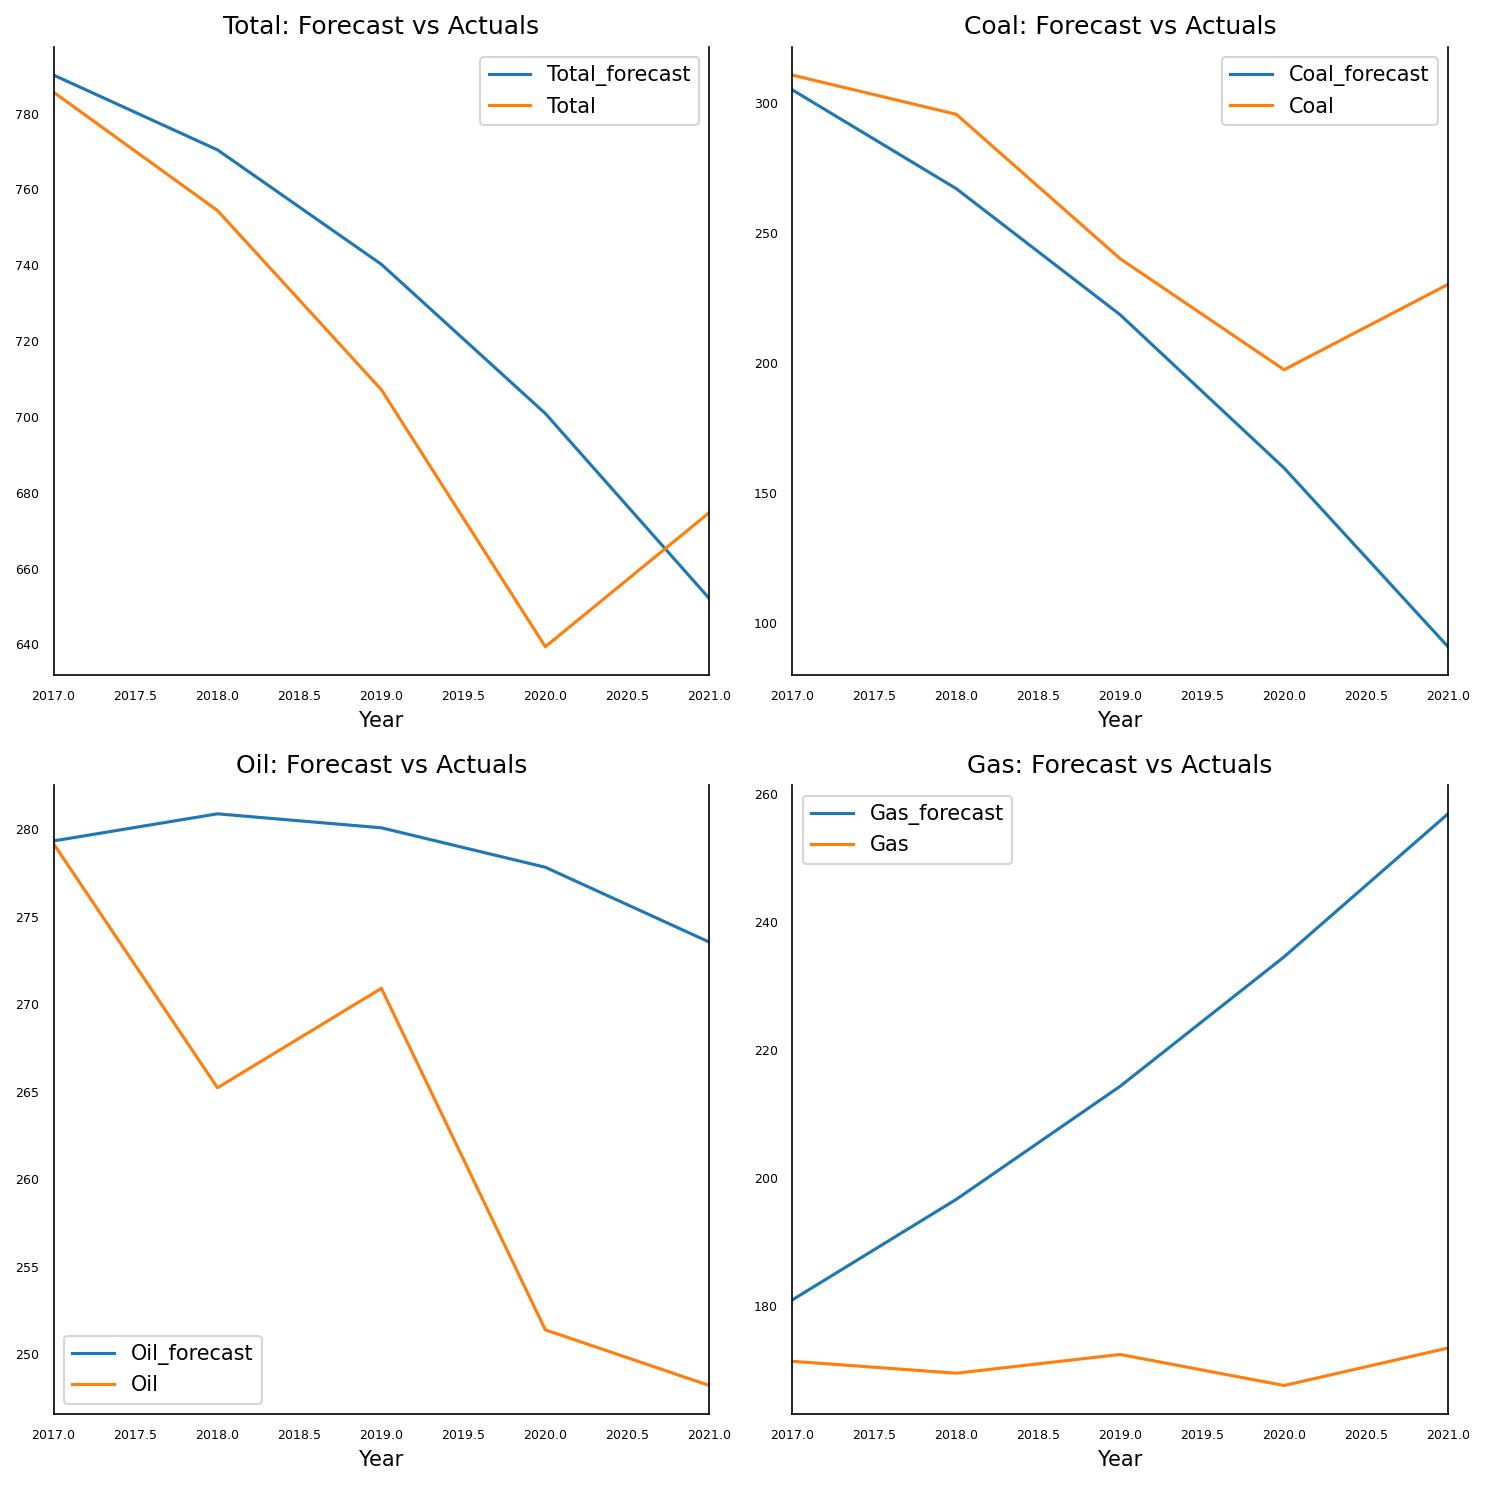

In [209]:
fig, axes = plt.subplots(nrows=int(len(df.columns)/2), ncols=2, dpi=150, figsize=(10,10))
for i, (col,ax) in enumerate(zip(df.columns, axes.flatten())):
    df_results[col+'_forecast'].plot(legend=True, ax=ax).autoscale(axis='x',tight=True)
    df_test[col][-nobs:].plot(legend=True, ax=ax);
    ax.set_title(col + ": Forecast vs Actuals")
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

Evaluate the Forecasts

In [210]:
# To evaluate the forecasts, let’s compute a comprehensive set of metrics, namely, the MAPE, ME, MAE, MPE, RMSE, corr and minmax.
from statsmodels.tsa.stattools import acf
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'corr':corr, 'minmax':minmax})

print('Forecast Accuracy of: Total')
accuracy_prod = forecast_accuracy(df_results['Total_forecast'].values, df_test['Total'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))

print('\nForecast Accuracy of: Coal')
accuracy_prod = forecast_accuracy(df_results['Coal_forecast'].values, df_test['Coal'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))

print('\nForecast Accuracy of: Oil')
accuracy_prod = forecast_accuracy(df_results['Oil_forecast'].values, df_test['Oil'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))

print('\nForecast Accuracy of: Gas')
accuracy_prod = forecast_accuracy(df_results['Gas_forecast'].values, df_test['Gas'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))


Forecast Accuracy of: Total
mape   :  0.0407
me     :  18.4929
mae    :  27.5496
mpe    :  0.0273
rmse   :  33.6657
corr   :  0.8504
minmax :  0.0385

Forecast Accuracy of: Coal
mape   :  0.2005
me     :  -46.6303
mae    :  46.6303
mpe    :  -0.2005
rmse   :  66.6279
corr   :  0.8287
minmax :  0.2005

Forecast Accuracy of: Oil
mape   :  0.0602
me     :  15.362
mae    :  15.362
mpe    :  0.0602
rmse   :  18.2879
corr   :  0.7405
minmax :  0.0554

Forecast Accuracy of: Gas
mape   :  0.2679
me     :  45.8159
mae    :  45.8159
mpe    :  0.2679
rmse   :  52.9823
corr   :  0.1791
minmax :  0.1994


Forecasting the future: for 2 years (since p=2)

In [211]:
df_differenced_all = df.diff().dropna()

In [212]:
df_differenced_all

,Total,Coal,Oil,Gas
Year,,,,
1981,-51.542638,6.573216,-51.156768,-5.452032
1982,-32.789463,-6.935952,-16.836080,-7.983856
1983,-4.128989,2.925536,-11.066484,4.004369
1984,21.639674,18.593136,1.492452,2.510223
1985,10.873376,7.044236,5.332311,0.000380
1986,3.353949,-5.613613,16.606476,-7.980923
1987,-15.029062,-13.538161,-11.293644,8.995859
1988,-3.418712,-7.362958,5.725609,-1.909332
1989,-20.231788,-6.082240,-28.465616,14.271280


In [213]:
forecast_input_all = df_differenced_all.values[-lag_order:]
forecast_input_all # the output is the values of total, coal, oil and gas for 2015 and 2016 (this depends on the train test split and lag_order)

array([[35.372553, 32.863371, -3.183317,  5.855966]])

In [214]:
model_all = VAR(df_differenced_all)
model_fitted_all = model_all.fit(p)
model_fitted_all.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 07, Mar, 2023
Time:                     15:02:49
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                    17.1393
Nobs:                     40.0000    HQIC:                   16.6002
Log likelihood:          -532.927    FPE:                1.19964e+07
AIC:                      16.2949    Det(Omega_mle):     7.48931e+06
--------------------------------------------------------------------
Results for equation Total
              coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------
const          -10.093778         4.770173           -2.116           0.034
L1.Total        -2.082878         1.821399           -1.144           0.253
L1.Coal          2.257885         1.908704            1.183           0.237
L1.O

In [215]:
# Forecast

l = df_differenced_all.last_valid_index() # gives the index of the last row in df_differenced_all
s = 10 # steps to future
fc_all = model_fitted_all.forecast(y=forecast_input_all, steps=s) 
df_forecast_all = pd.DataFrame(fc_all, index=list(range(l+1,l+s+1)), columns=df.columns + '_2d')
df_forecast_all

,Total_2d,Coal_2d,Oil_2d,Gas_2d
2022,-3.484481,4.437890,-3.561746,-4.346219
2023,-5.585658,-2.786743,-3.344367,1.383168
2024,-6.926565,-2.615624,-4.489678,0.153406
2025,-7.552083,-5.701358,-2.902396,1.174191
2026,-9.171228,-6.881139,-3.328007,1.071438
2027,-9.240125,-7.446312,-3.104615,1.320338
2028,-9.614356,-7.876331,-3.083724,1.330884
2029,-9.757758,-8.130551,-3.041186,1.394355
2030,-9.859785,-8.262447,-3.034778,1.409003
2031,-9.909841,-8.348843,-3.019043,1.426817


In [216]:
# Tranforming the future forecast back
df_results_all = invert_transformation(df, df_forecast_all, second_diff=True) 
df_results_all = df_results_all.loc[:, ['Total_forecast', 'Coal_forecast', 'Oil_forecast','Gas_forecast']]

In [217]:
df_results_all

,Total_forecast,Coal_forecast,Oil_forecast,Gas_forecast
2022,706.641638,267.522310,241.455561,174.993799
2023,732.944052,302.036829,231.366131,177.886714
2024,752.319902,333.935724,216.787023,180.933035
2025,764.143668,360.133260,199.305519,185.153546
2026,766.796206,379.449658,178.496007,190.445496
2027,760.208619,391.319743,154.581881,197.057783
2028,744.006676,395.313497,127.584030,205.000955
2029,718.046974,391.176701,97.544994,214.338481
2030,682.227487,378.777457,64.471180,225.085011
2031,636.498159,358.029370,28.378322,237.258357


In [218]:
# Concate the actual df with the forecasted df till 2031 (df_results_all)

df_results_all = df_results_all.rename(columns={"Total_forecast": "Total", "Coal_forecast": "Coal", "Oil_forecast": "Oil", "Gas_forecast": "Gas"})
# renaming the df_results_all columns to that of df

df_results_all

,Total,Coal,Oil,Gas
2022,706.641638,267.522310,241.455561,174.993799
2023,732.944052,302.036829,231.366131,177.886714
2024,752.319902,333.935724,216.787023,180.933035
2025,764.143668,360.133260,199.305519,185.153546
2026,766.796206,379.449658,178.496007,190.445496
2027,760.208619,391.319743,154.581881,197.057783
2028,744.006676,395.313497,127.584030,205.000955
2029,718.046974,391.176701,97.544994,214.338481
2030,682.227487,378.777457,64.471180,225.085011
2031,636.498159,358.029370,28.378322,237.258357


In [219]:
# Concat syntax
df_future  = pd.concat([df, df_results_all], axis=0)
df_future

,Total,Coal,Oil,Gas
1980,1100.065995,551.175520,412.456480,115.452640
1981,1048.523357,557.748736,361.299712,110.000608
1982,1015.733894,550.812784,344.463632,102.016752
1983,1011.604905,553.738320,333.397148,106.021121
1984,1033.244579,572.331456,334.889600,108.531344
1985,1044.117955,579.375692,340.221911,108.531724
1986,1047.471904,573.762079,356.828387,100.550801
1987,1032.442842,560.223918,345.534743,109.546660
1988,1029.024130,552.860960,351.260352,107.637328
1989,1008.792342,546.778720,322.794736,121.908608


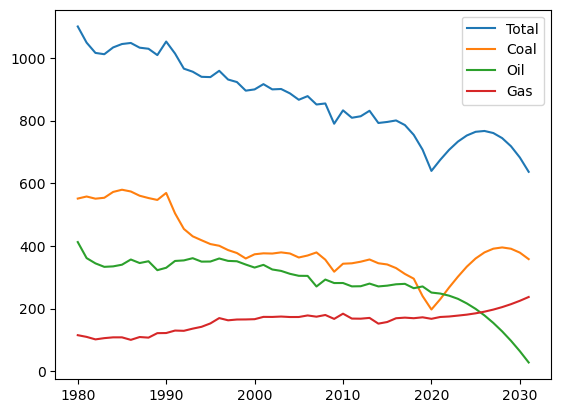

In [220]:
# Plot
plt.figure()

x = df_future.index
y1 = df_future['Total']
y2 = df_future['Coal']
y3 = df_future['Oil']
y4 = df_future['Gas']

plt.plot(x,y1)
plt.plot(x,y2)
plt.plot(x,y3)
plt.plot(x,y4)

plt.legend(['Total', 'Coal', 'Oil', 'Gas'])

In [221]:
df_future["Year"]=df_future.index
df_future

,Total,Coal,Oil,Gas,Year
1980,1100.065995,551.175520,412.456480,115.452640,1980
1981,1048.523357,557.748736,361.299712,110.000608,1981
1982,1015.733894,550.812784,344.463632,102.016752,1982
1983,1011.604905,553.738320,333.397148,106.021121,1983
1984,1033.244579,572.331456,334.889600,108.531344,1984
1985,1044.117955,579.375692,340.221911,108.531724,1985
1986,1047.471904,573.762079,356.828387,100.550801,1986
1987,1032.442842,560.223918,345.534743,109.546660,1987
1988,1029.024130,552.860960,351.260352,107.637328,1988
1989,1008.792342,546.778720,322.794736,121.908608,1989


In [222]:
# save to csv
df_future.to_csv('Data/Germany_future.csv', index=False)